# Visualize Data of Paths on Single Map

In [2]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [3]:
%cd ../../Diffusion_Planning

/home/jason/Desktop/Jason/Diffusion/Diffusion_Planning


In [4]:
!ls

Captures     Modeling	   README.md	     Results
Checkpoints  PathPlanning  requirements.txt


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


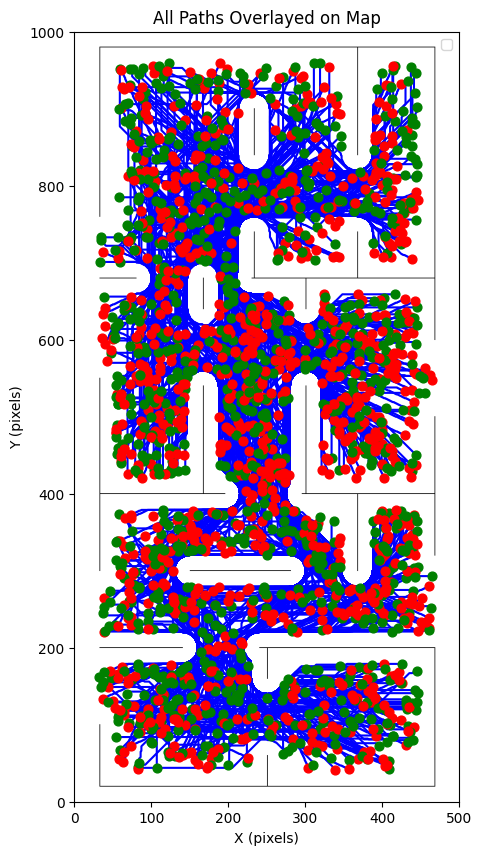

In [9]:

def prepare_map_image(map_data):
    """
    Prepare a black-and-white image for the map.
    Args:
    - map_data (np.ndarray): The map as a 2D numpy array.
    Returns:
    - np.ndarray: The prepared RGB map image.
    """
    # Map values: 0 -> white (free space), 1 -> black (obstacle)
    rgb_image = np.zeros((*map_data.shape, 3))
    rgb_image[map_data == 0] = [1, 1, 1]  # Free space is white
    rgb_image[map_data == 1] = [0, 0, 0]  # Obstacles are black
    return rgb_image

def plot_path_on_map(map_image, path, ax=None, show=True):
    """
    Overlay a path on the map image.
    Args:
    - map_image (np.ndarray): The RGB map image.
    - path (pd.DataFrame): The path as a DataFrame with 'x' and 'y' columns.
    - ax (matplotlib.axes.Axes, optional): Axis to use for plotting. Creates a new axis if None.
    - show (bool): Whether to show the plot after drawing. Defaults to True.
    """
    if ax is None:
        # Create a new figure and axis if none is provided
        plt.figure(figsize=(10, 10))
        ax = plt.gca()

    # Display the map image with proper extent based on its dimensions
    map_height, map_width = map_image.shape[:2]
    ax.imshow(map_image, origin='lower', extent=[0, map_width, 0, map_height], cmap='gray')

    # If no path is provided or it's empty, return
    if path.empty:
        return

    # Convert path to numpy array for easier indexing
    coordinates = path[['x', 'y']].to_numpy()

    # Plot the path as a line
    ax.plot(coordinates[:, 0], coordinates[:, 1], color='blue', linewidth=1.5, zorder=10)

    # Mark the start and end points distinctly
    ax.scatter(coordinates[0, 0], coordinates[0, 1], color='green', s=40, zorder=20)
    ax.scatter(coordinates[-1, 0], coordinates[-1, 1], color='red', s=40, zorder=20)

    # Optional: Show the plot
    if show:
        plt.show()


def plot_paths_on_map(csv, map_file, max_plots=10, single_plot=False):
    """
    Plot all paths from a CSV file on a map.
    Args:
    - csv (str): Path to the normalized path data CSV.
    - map_file (str): Path to the map JSON file.
    - max_plots (int): Maximum number of paths to plot.
    - single_plot (bool): Whether to plot all paths on a single figure.
    """
    # Load the map data
    with open(map_file, 'r') as f:
        map_data = json.load(f)
        map_data = np.array(map_data)

    # Load the normalized path data
    normalized_data = pd.read_csv(csv)

    # Prepare the black-and-white map image
    map_image = prepare_map_image(map_data)

    if single_plot:
        # Create a single figure for all paths
        plt.figure(figsize=(10, 10))
        ax = plt.gca()

        # Display the map image once
        map_height, map_width = map_image.shape[:2]
        ax.imshow(map_image, origin='lower', extent=[0, map_width, 0, map_height], cmap='gray')

    # Counter for the number of plots
    count = 0

    for pair_id in normalized_data['pair_id'].unique():
        # Get path data for the current pair_id
        path = normalized_data[normalized_data['pair_id'] == pair_id]

        if single_plot:
            # Overlay all paths on the same plot
            plot_path_on_map(map_image, path, ax=ax, show=False)
        else:
            # Plot each path on a separate figure
            plot_path_on_map(map_image, path)

        count += 1
        if count >= max_plots:
            break

    if single_plot:
        # Finalize and show the combined plot
        ax.set_title("All Paths Overlayed on Map")
        ax.set_xlabel("X (pixels)")
        ax.set_ylabel("Y (pixels)")
        ax.legend()
        plt.show()

# Usage
dataset = 4
plot_paths_on_map(
    csv=f"PathPlanning/dataset_{dataset}/path_data/path_data.csv",
    map_file=f"PathPlanning/dataset_{dataset}/map_data/map_1.json",
    max_plots=1000,  # Limit number of paths
    single_plot=True # Output single image or separate images
)
